# Team 4 - TED Talks

![](https://psmarketingimages.s3.amazonaws.com/blog/wp-content/uploads/2017/04/23103819/TED-Talks-for-Small-Business-and-Entrepreneurs.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/rounakbanik/ted-talks)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- The `ratings` column is in dictionary format. How should we handle them?
- Same for `related_talks` and `tags` column
- Can you find the `year` of the talks?
- And more...

In [0]:
# Start your codes here!

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast

In [0]:
ted=pd.read_csv('https://raw.githubusercontent.com/elasio/dataset/master/ted_main.csv')

In [0]:
#def str_to_list(a):
# return ast.literal_eval(a)


In [335]:
ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null int64
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(7), object(10)
memory usage: 338.8+ KB


In [0]:
# convert Unix timestamp to nomal datetime

ted['film_date'] = pd.to_datetime(ted['film_date'],unit='s')
ted['published_date'] = pd.to_datetime(ted['published_date'],unit='s')

In [337]:
ted.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [338]:
ted.nunique()

comments               559
description           2550
duration              1083
event                  355
film_date              735
languages               66
main_speaker          2156
name                  2550
num_speaker              5
published_date        2490
ratings               2550
related_talks         2550
speaker_occupation    1458
tags                  2530
title                 2550
url                   2550
views                 2550
dtype: int64

In [0]:
# Create a copy of data to work with.

ted_working=ted

In [0]:
# Create dataframe number of each kind of rating. 

temp=ted_working['ratings'].apply(ast.literal_eval)                             # Convert string to list of dict
rating_data=pd.DataFrame(temp[0]).sort_values(by='id')                          # Convert list of dict to DataFrame
rating_data.index=range(14)                                                     # Set index after sort (to avoid data resort by the index when concat)
rating_columns=rating_data['name'].unique()                                     # Get array of rating titles order by 'id'

for i in range(1,len(temp),1):                                                  # Get dataframe number of each rating title
  rating_data_tmp=pd.DataFrame(temp[i])
  rating_data_tmp=rating_data_tmp.sort_values(by='id')
  rating_data_tmp.index=range(14)
  rating_data=pd.concat([rating_data['count'],rating_data_tmp['count']],axis=1)


In [0]:
rating_data=rating_data.transpose()                                             # Tranpose to set rating name a column

In [0]:
rating_data.index=range(len(ted))                                               # Set index to each ted talk rating data
rating_data.columns=rating_columns                                              # set rating name to columns

In [343]:
rating_data.columns

Index(['Beautiful', 'Confusing', 'Courageous', 'Funny', 'Informative',
       'Ingenious', 'Inspiring', 'Longwinded', 'Unconvincing', 'Fascinating',
       'Jaw-dropping', 'Persuasive', 'OK', 'Obnoxious'],
      dtype='object')

In [344]:
rating_data

,Beautiful,Confusing,Courageous,Funny,Informative,Ingenious,Inspiring,Longwinded,Unconvincing,Fascinating,Jaw-dropping,Persuasive,OK,Obnoxious
0,4573,242,3253,19645,7346,6073,24924,387,300,10581,4439,10704,1174,209
1,58,62,139,544,443,56,413,113,258,132,116,268,203,131
2,60,27,45,964,395,183,230,78,104,166,54,230,146,142
3,291,32,760,59,380,105,1070,53,36,132,230,460,85,35
4,942,72,318,1390,5433,3202,2893,110,67,4606,3736,2542,248,61
5,706,301,721,1102,1038,397,5211,285,377,1350,669,2423,441,335
6,277,72,477,2484,226,320,438,193,225,316,61,311,308,290
7,98,25,34,9,121,195,175,26,26,153,57,37,63,5
8,145,70,562,60,623,211,441,177,283,313,60,764,154,83
9,767,111,476,26,304,116,2556,306,838,459,209,1543,245,371


In [0]:
ted_working=ted_working.drop(columns='ratings')


In [346]:

ted_working=pd.concat([ted_working,rating_data],axis=1)
ted_working.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 30 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null datetime64[ns]
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null datetime64[ns]
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
Beautiful             2550 non-null int64
Confusing             2550 non-null int64
Courageous            2550 non-null int64
Funny                 2550 non-null int64
Informative           2550

In [347]:
ted_working['total_rating']=ted_working[rating_data.columns].sum(axis=1)
ted_working.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 31 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null datetime64[ns]
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null datetime64[ns]
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
Beautiful             2550 non-null int64
Confusing             2550 non-null int64
Courageous            2550 non-null int64
Funny                 2550 non-null int64
Informative           2550

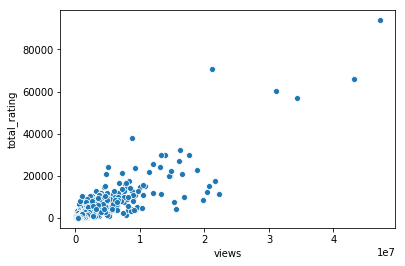

In [348]:
#relative of number of views and number of rating
sns.scatterplot(data=ted_working,x='views',y='total_rating')


In [349]:
#top 10 most rating talk
ted_working.sort_values(by='total_rating').tail(10)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,related_talks,speaker_occupation,tags,title,url,views,Beautiful,Confusing,Courageous,Funny,Informative,Ingenious,Inspiring,Longwinded,Unconvincing,Fascinating,Jaw-dropping,Persuasive,OK,Obnoxious,total_rating
530,1155,"Our lives, our cultures, are composed of many ...",1129,TEDGlobal 2009,2009-07-23,46,Chimamanda Ngozi Adichie,Chimamanda Ngozi Adichie: The danger of a sing...,1,2009-10-07 01:00:00,"[{'id': 159, 'hero': 'https://pe.tedcdn.com/im...",Novelist,"['Africa', 'books', 'culture', 'identity', 'st...",The danger of a single story,https://www.ted.com/talks/chimamanda_adichie_t...,13298341,5607,85,2817,713,2687,744,9566,109,103,2983,948,3002,333,78,29775
176,554,David Gallo shows jaw-dropping footage of amaz...,327,TED2007,2007-03-03,47,David Gallo,David Gallo: Underwater astonishments,1,2008-01-11 00:28:00,"[{'id': 77, 'hero': 'https://pe.tedcdn.com/ima...",Oceanographer,"['animals', 'evolution', 'exploration', 'fish'...",Underwater astonishments,https://www.ted.com/talks/david_gallo_shows_un...,13926113,5201,95,216,815,3875,543,1647,79,80,8448,8328,236,322,126,30011
1163,1155,In a culture where being social and outgoing a...,1144,TED2012,2012-02-28,44,Susan Cain,Susan Cain: The power of introverts,1,2012-03-02 20:28:12,"[{'id': 1042, 'hero': 'https://pe.tedcdn.com/i...",Quiet revolutionary,"['business', 'culture', 'introvert', 'psycholo...",The power of introverts,https://www.ted.com/talks/susan_cain_the_power...,17629275,2467,83,3944,1049,3623,830,10218,163,147,3157,442,3365,469,80,30037
1129,754,We believe we should work hard in order to be ...,740,TEDxBloomington,2011-05-11,46,Shawn Achor,Shawn Achor: The happy secret to better work,1,2012-02-01 16:09:38,"[{'id': 366, 'hero': 'https://pe.tedcdn.com/im...",Psychologist,"['TEDx', 'brain', 'business', 'cognitive scien...",The happy secret to better work,https://www.ted.com/talks/shawn_achor_the_happ...,16209727,1007,61,471,7315,3886,1162,11213,78,82,2529,683,3426,206,61,32180
1030,1627,At his Stanford University commencement speech...,904,Stanford University,2005-06-12,0,Steve Jobs,Steve Jobs: How to live before you die,1,2011-10-06 02:42:00,"[{'id': 848, 'hero': 'https://pe.tedcdn.com/im...",Visionary,"['business', 'computers', 'creativity', 'death...",How to live before you die,https://www.ted.com/talks/steve_jobs_how_to_li...,8744428,3854,138,4151,783,1368,1197,17290,158,201,3364,2051,2606,863,134,38158
677,1930,Simon Sinek has a simple but powerful model fo...,1084,TEDxPuget Sound,2009-09-17,45,Simon Sinek,Simon Sinek: How great leaders inspire action,1,2010-05-04 09:31:00,"[{'id': 814, 'hero': 'https://pe.tedcdn.com/im...",Leadership expert,"['TEDx', 'business', 'entrepreneur', 'leadersh...",How great leaders inspire action,https://www.ted.com/talks/simon_sinek_how_grea...,34309432,1640,112,1161,390,6600,3413,21564,390,930,7440,2659,8845,1341,294,56779
837,1927,Brené Brown studies human connection -- our ab...,1219,TEDxHouston,2010-06-06,52,Brené Brown,Brené Brown: The power of vulnerability,1,2010-12-23 14:45:00,"[{'id': 1391, 'hero': 'https://pe.tedcdn.com/i...",Vulnerability researcher,"['TEDx', 'communication', 'culture', 'depressi...",The power of vulnerability,https://www.ted.com/talks/brene_brown_on_vulne...,31168150,7942,155,8280,5225,4561,1094,21444,283,233,4638,2100,3510,500,113,60078
1346,2290,"Body language affects how others see us, but i...",1262,TEDGlobal 2012,2012-06-26,51,Amy Cuddy,Amy Cuddy: Your body language may shape who yo...,1,2012-10-01 15:00:08,"[{'id': 605, 'hero': 'https://pe.tedcdn.com/im...",Social psychologist,"['body language', 'brain', 'business', 'psycho...",Your body language may shape who you are,https://www.ted.com/talks/amy_cuddy_your_body_...,43155405,3232,197,6305,938,9787,1428,21210,338,335,11111,3586,6217,1129,155,65968
201,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,2008-02-27,49,Jill Bolte Taylor,Ji

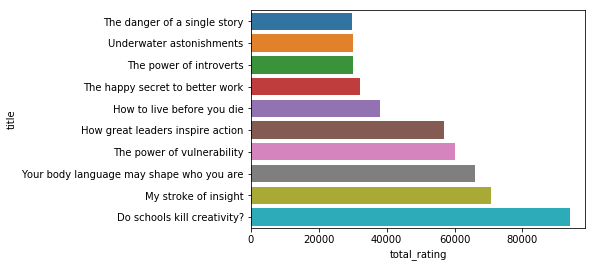

In [350]:
temp=ted_working.sort_values(by='total_rating').tail(10)
sns.barplot(data=temp,y='title',x='total_rating')

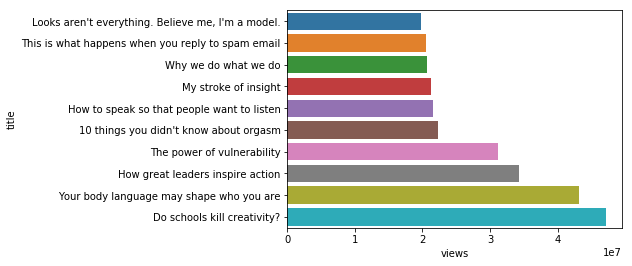

In [351]:
#top view
temp=ted_working.sort_values(by='views').tail(10)
sns.barplot(data=temp,y='title',x='views')

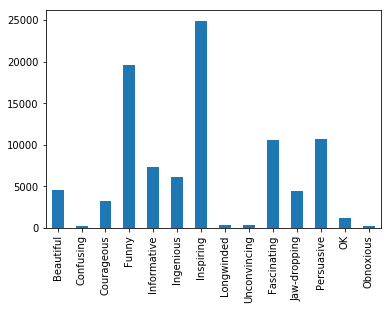

In [352]:
#rating of each talk

ted_working.iloc[0][rating_data.columns].plot(kind='bar')

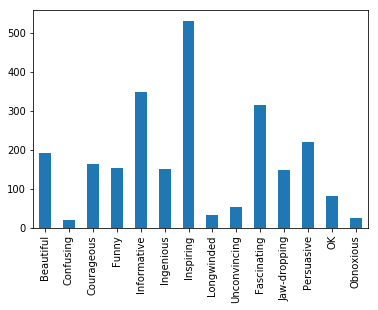

In [353]:
#average rating of all talk
ted_working[rating_data.columns].mean().plot(kind="bar")

In [0]:
ted_working['tags'] = ted_working['tags'].apply(ast.literal_eval)


In [0]:
temp=ted_working.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
temp.name='tag'

In [0]:
ted_working=ted_working.drop('tags',axis=1).join(temp)

In [359]:
ted_working,info()

416

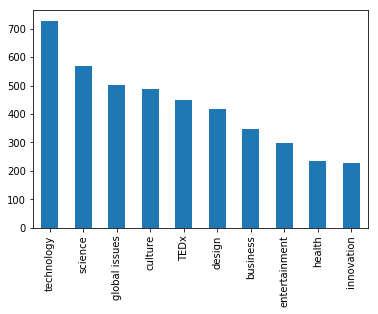

In [363]:
# top 10 tag appear

ted_working['tag'].value_counts().head(10).plot(kind='bar')

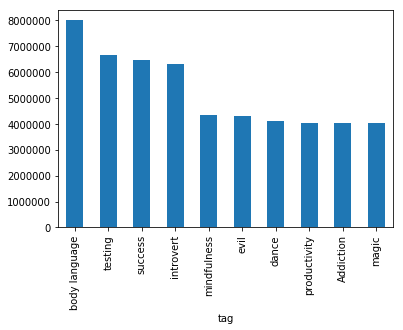

In [376]:
#top 10 most atractive tag (highest views)
ted_working.groupby('tag').mean().sort_values(by='views',ascending=False)['views'].head(10).plot(kind='bar')
